# Solar and Lunar Eclipses

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime

In [2]:
lunar = pd.read_csv('lunar.csv')
solar = pd.read_csv('solar.csv')

## Solar Analysis

In [3]:
solar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [4]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 15 columns):
Catalog Number       11898 non-null int64
Calendar Date        11898 non-null object
Eclipse Time         11898 non-null object
Delta T (s)          11898 non-null int64
Lunation Number      11898 non-null int64
Saros Number         11898 non-null int64
Eclipse Type         11898 non-null object
Gamma                11898 non-null float64
Eclipse Magnitude    11898 non-null float64
Latitude             11898 non-null object
Longitude            11898 non-null object
Sun Altitude         11898 non-null int64
Sun Azimuth          11898 non-null int64
Path Width (km)      7698 non-null object
Central Duration     7698 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


In [5]:
solar.describe()

,Catalog Number,Delta T (s),Lunation Number,Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth
count,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,5949.500000,12142.172802,-18546.959321,87.483190,-0.002469,0.812748,36.505295,180.264330
std,3434.801086,13583.402888,17906.572982,48.380284,0.900860,0.300398,32.417350,110.745408
min,1.000000,-6.000000,-49456.000000,-13.000000,-1.569000,0.000000,0.000000,0.000000
25%,2975.250000,970.250000,-33954.750000,47.000000,-0.786575,0.675925,0.000000,89.000000
50%,5949.500000,5636.500000,-18495.000000,87.000000,-0.003850,0.950600,38.000000,180.000000
75%,8923.750000,20943.500000,-3039.250000,128.000000,0.776900,1.018400,66.000000,272.000000
max,11898.000000,46438.000000,12378.000000,190.000000,1.570600,1.081300,90.000000,360.000000


### Data Wrangling

In [6]:
solar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [7]:
months = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12}

In [8]:
solar.loc[:,'Year']  = solar['Calendar Date'].apply(lambda x: int(x.split(' ')[0]))
solar.loc[:,'Month'] = solar['Calendar Date'].apply(lambda x: x.split(' ')[1]).map(months)
solar.loc[:,'Day']   = solar['Calendar Date'].apply(lambda x: int(x.split(' ')[2]))

In [9]:
solar.loc[:,'Hour']    = solar['Eclipse Time'].apply(lambda x: int(x.split(':')[0]))
solar.loc[:,'Minute']  = solar['Eclipse Time'].apply(lambda x: int(x.split(':')[1]))
solar.loc[:,'Seconds'] = solar['Eclipse Time'].apply(lambda x: int(x.split(':')[2]))

In [10]:
# o tipo datetime só aceita datas acima de 1 AD, por isso filtraremos para facilitar a vida

solar = solar[solar.Year > 0]

In [11]:
solar.loc[:,'Time'] = solar.apply(lambda x: datetime.datetime(x.Year, x.Month, x.Day, x.Hour, x.Minute, x.Seconds), axis=1)

In [12]:
solar.drop(['Calendar Date', 'Eclipse Time', 'Catalog Number'], axis=1, inplace=True)
solar.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Seconds'], axis=1, inplace=True)

In [13]:
solar.head(10)

,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Time
4774,10520,-24719,66,T,0.3625,1.0617,44.4N,121.2E,69,179,218,04m56s,0001-06-10 06:44:16
4775,10515,-24713,71,A,-0.0397,0.9558,24.7S,79.2W,88,3,161,05m14s,0001-12-03 20:05:38
4776,10510,-24707,76,H,-0.4168,1.0087,3.1S,72.5W,65,356,33,01m00s,0002-05-30 19:45:43
4777,10505,-24701,81,H,0.6476,1.0074,20.0N,149.5E,49,187,33,00m45s,0002-11-23 05:06:15
4778,10500,-24695,86,P,-1.2319,0.5663,69.0S,139.3W,0,337,NaN,NaN,0003-05-20 01:41:30
4779,10496,-24690,53,P,-1.3804,0.2914,71.4S,32.1W,0,114,NaN,NaN,0003-10-14 09:21:59
4780,10495,-24689,91,P,1.2822,0.4772,69.6N,41.2W,0,211,NaN,NaN,0003-11-12 19:36:29
4781,10491,-24684,58,A,0.8647,0.9486,61.7N,16.8E,30,142,375,04m15s,0004-04-08 11:39:14
4782,10486,-24678,63,H,-0.7368,1.0095,47.8S,156.3W,42,27,48,00m46s,0004-10-02 23:52:25
4783,10481,-24672,68,H,0.0789,1.0022,6.6N,37.2W,85,162,8,00m14s,0005-03-28 17:23:34


In [14]:
solar['Eclipse Type'].value_counts()

P     2303
A     2280
T     1845
H      260
Pe     100
Pb      97
Am      45
Tm      45
A+      25
An      23
A-      20
H2      18
As      17
H3      11
T-      11
Tn       8
Hm       7
Ts       7
T+       2
Name: Eclipse Type, dtype: int64

In [15]:
types  = solar['Eclipse Type'].value_counts().index
values = solar['Eclipse Type'].value_counts().values

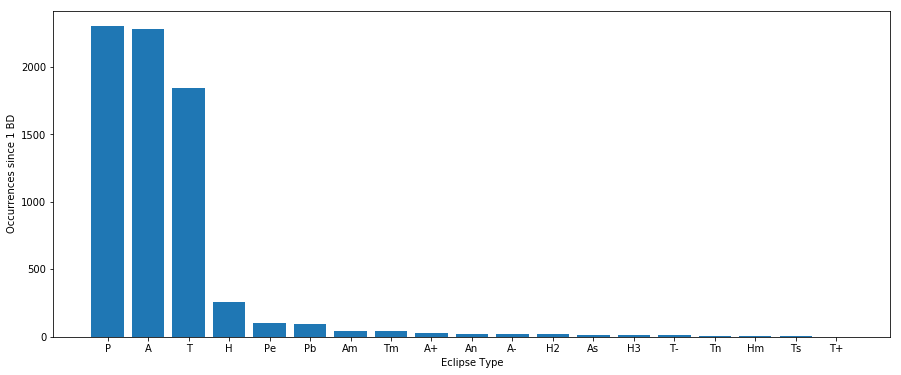

In [16]:
plt.figure(figsize=(15,6))
plt.bar(types, values)
plt.xlabel('Eclipse Type')
plt.ylabel('Occurrences since 1 BD')
plt.show()

In [17]:
solar.loc[:,'Eclipse Type'] = solar['Eclipse Type'].apply(lambda x:list(x)[0])

In [18]:
types  = solar['Eclipse Type'].value_counts().index
values = solar['Eclipse Type'].value_counts().values

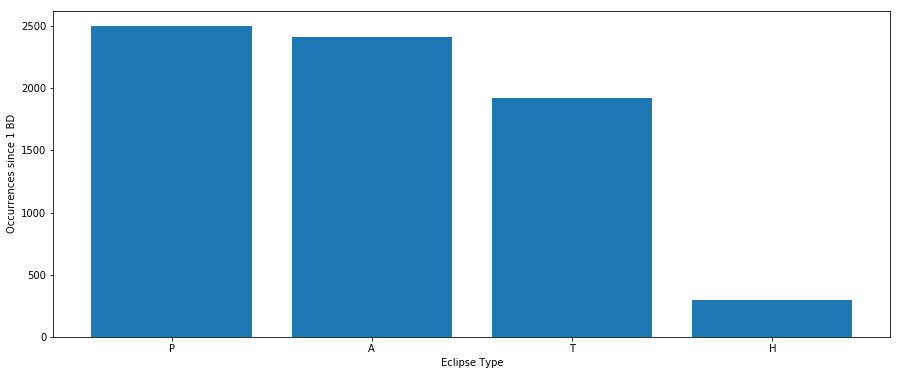

In [19]:
plt.figure(figsize=(15,6))
plt.bar(types, values)
plt.xlabel('Eclipse Type')
plt.ylabel('Occurrences since 1 BD')
plt.show()

In [40]:
partial = solar[solar['Eclipse Type'] == 'P']
annular = solar[solar['Eclipse Type'] == 'A']
total   = solar[solar['Eclipse Type'] == 'T']
hybrid  = solar[solar['Eclipse Type'] == 'H']

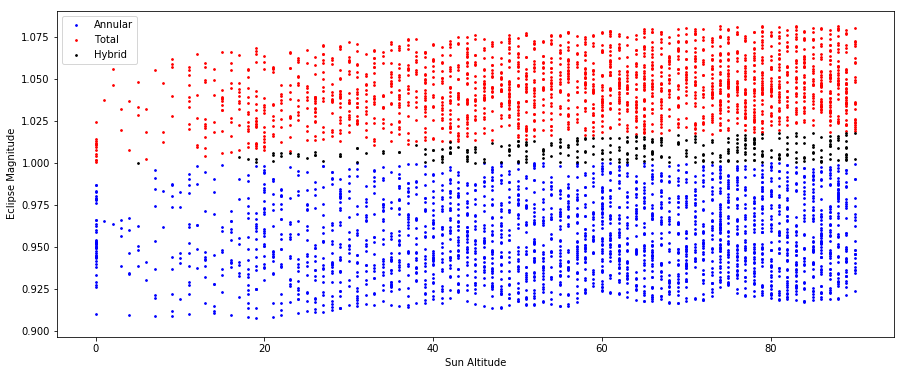

In [66]:
plt.figure(figsize=(15,6))

plt.scatter(annular['Sun Altitude'], annular['Eclipse Magnitude'], s=3, c='blue')
plt.scatter(total['Sun Altitude'], total['Eclipse Magnitude'], s=3, c='red')
plt.scatter(hybrid['Sun Altitude'], hybrid['Eclipse Magnitude'], =3, c='black')

plt.legend(['Annular', 'Total', 'Hybrid'])

plt.xlabel('Sun Altitude')
plt.ylabel('Eclipse Magnitude')

plt.show()

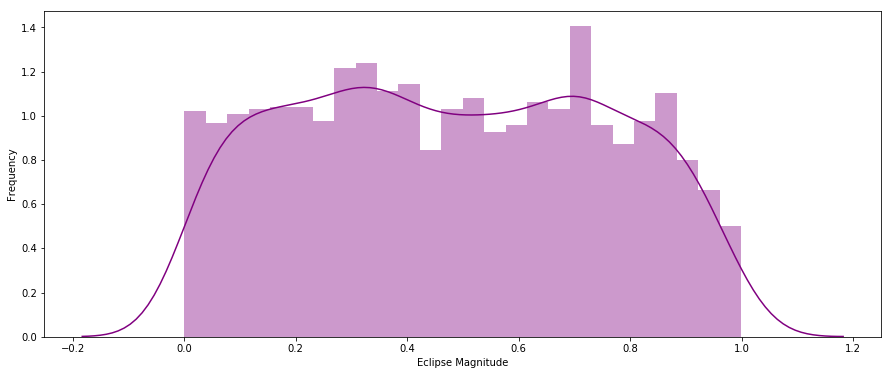

In [96]:
plt.figure(figsize=(15,6))
sns.distplot(partial['Eclipse Magnitude'].values, bins=int(1 + 3.322*np.log(partial.shape[0])), color='purple')
plt.xlabel('Eclipse Magnitude')
plt.ylabel('Frequency')
plt.show()